## Regressão Logística com Cross Validation
Regressão logística aplicada à dados bancários para classificação da viabilidade de aprovação do crédito para cliente com base em 16 atributos quantitativos e qualitativos

## Preparação

In [ ]:
install.packages("ROCR")
install.packages("dummies")
install.packages("caret") 
install.packages("e1071") 

library(ROCR)    # para explorar graficamente o modelo com a curva ROC
library(dummies) # para a codificação dos dados qualitativos
library(caret)   # for Cross Validation functions
library(e1071)   # para o uso da função de regressão logística
library(dplyr)   # Analises estatisticas
library(ggplot2) # Exploração Gráfica
library(class)   # Para usar a função knn() para o modelo de k-vizinhos mais próximos
library(glue)    # print especial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummies-1.5.6 provided by Decision Patterns


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter,

In [ ]:
colnames(df)

NULL

## Analise Exploratória dos dados

### Informações da fonte
'http://archive.ics.uci.edu/ml/datasets/credit+approval'

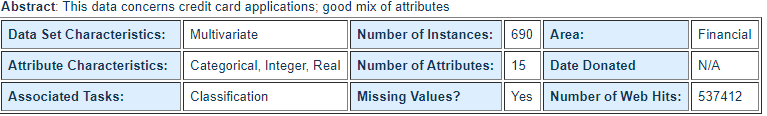

Rótulo do dataset disponibilizado pela fonte:

"This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values."

Dicionário de dados:

A1: b, a.

A2: continuous.

A3: continuous.

A4: u, y, l, t.

A5: g, p, gg.

A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.

A7: v, h, bb, j, n, z, dd, ff, o.

A8: continuous.

A9: t, f.

A10: t, f.

A11: continuous.

A12: t, f.

A13: g, p, s.

A14: continuous.

A15: continuous.

A16: +,- (class attribute)


A variável resposta pode conter o valor "+" que representa Aprovado e "-" que significa Recusado

### Visualizando a base

In [ ]:
df <- read.csv('/content/crx.data')
head(df)

,b,X30.83,X0,u,g,w,v,X1.25,t,t.1,X01,f,g.1,X00202,X0.1,X.
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.50,t,f,0,t,g,00164,31285,+


In [ ]:
colnames(df)

[1] "b"      "X30.83" "X0"     "u"      "g"      "w"      "v"      "X1.25" 
 [9] "t"      "t.1"    "X01"    "f"      "g.1"    "X00202" "X0.1"   "X."

In [ ]:
nrow(df)

[1] 689

In [ ]:
ncol(df)

[1] 16

In [ ]:
str(df)

'data.frame':	689 obs. of  16 variables:
 $ b     : chr  "a" "a" "b" "b" ...
 $ X30.83: chr  "58.67" "24.50" "27.83" "20.17" ...
 $ X0    : num  4.46 0.5 1.54 5.62 4 ...
 $ u     : chr  "u" "u" "u" "u" ...
 $ g     : chr  "g" "g" "g" "g" ...
 $ w     : chr  "q" "q" "w" "w" ...
 $ v     : chr  "h" "h" "v" "v" ...
 $ X1.25 : num  3.04 1.5 3.75 1.71 2.5 ...
 $ t     : chr  "t" "t" "t" "t" ...
 $ t.1   : chr  "t" "f" "t" "f" ...
 $ X01   : int  6 0 5 0 0 0 0 0 0 0 ...
 $ f     : chr  "f" "f" "t" "f" ...
 $ g.1   : chr  "g" "g" "g" "s" ...
 $ X00202: chr  "00043" "00280" "00100" "00120" ...
 $ X0.1  : int  560 824 3 0 0 31285 1349 314 1442 0 ...
 $ X.    : chr  "+" "+" "+" "+" ...


In [ ]:
summary(df)

      b                X30.83                X0              u            
 Length:689         Length:689         Min.   : 0.000   Length:689        
 Class :character   Class :character   1st Qu.: 1.000   Class :character  
 Mode  :character   Mode  :character   Median : 2.750   Mode  :character  
                                       Mean   : 4.766                     
                                       3rd Qu.: 7.250                     
                                       Max.   :28.000                     
      g                  w                  v                 X1.25       
 Length:689         Length:689         Length:689         Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 0.165  
 Mode  :character   Mode  :character   Mode  :character   Median : 1.000  
                                                          Mean   : 2.225  
                                                          3rd Qu.: 2.625  
                         

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
sum(df == '?')

[1] 67

### Tratando os dados

1 - Colocando um cabeçalho nas colunas

In [ ]:
for (i in 1:ncol(df)) {
  colnames(df)[i] <-  paste('v', i, sep='')
}


In [ ]:
head(df)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.50,t,f,0,t,g,00164,31285,+


2 - encontrando e substituindo os NA

Nesta base, os missing values estão representados pelo sinal de interrogação "?", os converterei para o formato de dados ausentes do R "NA" e os excluirei em seguida com na.omit()

In [ ]:
unique(df$v1)

[1] "a" "b" "?"

In [ ]:
aaa <- select(df, v1, v4,	v5,	v6,	v7,	v9,	v10,	v11,	v12,	v13, v16)
for (i in colnames(aaa)) {
  print(unique(df[i]))
}

    v1
1    a
3    b
248  ?
    v4
1    u
8    y
206  ?
317  l
    v5
1    g
8    p
206  ?
317 gg
    v6
1    q
3    w
5    m
6    r
7   cc
8    k
10   c
18   d
23   x
26   i
28   e
30  aa
39  ff
89   j
206  ?
    v7
1    h
3    v
26  bb
39  ff
89   j
105  z
206  ?
262  o
266 dd
269  n
   v9
1   t
10  f
  v10
1   t
2   f
    v11
1     6
2     0
3     5
14    7
15   10
16    3
20   17
23    1
25    2
26    9
31    8
32   15
35   11
36   12
44   40
46   23
60    4
105  20
121  67
147  14
209  16
234  13
507  19
  v12
1   f
3   t
    v13
1     g
4     s
206   p
   v16
1    +
70   -


In [ ]:
sum(df == '?')

[1] 67

In [ ]:
df[df[]=="?"] <- NA

In [ ]:
sum(is.na(df))

[1] 67

In [ ]:
df <- na.omit(df)

In [ ]:
sum(is.na(df))

[1] 0

3 - Alterando o tipo das variáveis de chr para int ou dbl com as.numeric()

In [ ]:
head(df,3)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,+


In [ ]:
df$v2 <- as.numeric(df$v2)
df$v14 <- as.numeric(df$v14)
df$v15 <- as.numeric(df$v15)

4 - Alterando a variável resposta de '+/-' para '0/1' e transformando em fator

In [ ]:
# Duas diferentes formas de substtuir os dados
df$v16 <- replace(df$v16, df$v16 == '+', 1)
df["v16"][df["v16"] == "-"] <- 0

In [ ]:
df$v16 <- as.numeric(df$v16)

5 - Codificando com one hot encode as variáveis categóricas

In [ ]:
df <- dummy.data.frame(df, sep = ".")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

In [ ]:
head(df)

,v1.a,v1.b,v2,v3,v4.l,v4.u,v4.y,v5.g,v5.gg,v5.p,⋯,v10.t,v11,v12.f,v12.t,v13.g,v13.p,v13.s,v14,v15,v16
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,0,58.67,4.460,0,1,0,1,0,0,⋯,1,6,1,0,1,0,0,43,560,1
2,1,0,24.50,0.500,0,1,0,1,0,0,⋯,0,0,1,0,1,0,0,280,824,1
3,0,1,27.83,1.540,0,1,0,1,0,0,⋯,1,5,0,1,1,0,0,100,3,1
4,0,1,20.17,5.625,0,1,0,1,0,0,⋯,0,0,1,0,0,0,1,120,0,1
5,0,1,32.08,4.000,0,1,0,1,0,0,⋯,0,0,0,1,1,0,0,360,0,1
6,0,1,33.17,1.040,0,1,0,1,0,0,⋯,0,0,0,1,1,0,0,164,31285,1


## Criando o modelo de Regressão Logística com CrossValidation

In [ ]:
df$v16 <- as.factor(df$v16)

Se deixar a vriável resposta como fator o resultado do predict será dada em 0s e 1s, se deixar como numerico, a saída será apenas a probabilidade

In [ ]:
ctrl <- trainControl(method="repeatedcv", number= 20, repeats=5)

In [ ]:
fit <- train(v16~., data=df, method="glm", family="binomial", trControl=ctrl, preProcess = c("center", "scale"))
fit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, n

Generalized Linear Model 

652 samples
 46 predictor
  2 classes: '0', '1' 

Pre-processing: centered (46), scaled (46) 
Resampling: Cross-Validated (20 fold, repeated 5 times) 
Summary of sample sizes: 619, 620, 619, 619, 619, 619, ... 
Resampling results:

  Accuracy   Kappa    
  0.8592015  0.7174409


In [ ]:
# A probailidade de pertencer a uma ou à outra classe
predict_test_prob = predict(fit, newdata= df, type="prob")
head(round(predict_test_prob,3))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,0,1
,<dbl>,<dbl>
1,0.033,0.967
2,0.224,0.776
3,0.073,0.927
4,0.228,0.772
5,0.507,0.493
6,0.000,1.000


In [ ]:
# Ajustanto para ver apenas os valores acima de 50% temos a classificação como 0 ou 1
# Probabilidade acima de 50% para 0 será 0, acima de 50% para 1 será 1
predict_test_prob = predict(fit, newdata= df, type="prob")>0.5
head((predict_test_prob))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,0,1
1,FALSE,TRUE
2,FALSE,TRUE
3,FALSE,TRUE
4,FALSE,TRUE
5,TRUE,FALSE
6,FALSE,TRUE


In [ ]:
predict_test = predict(fit, newdata= df, type="raw")
head(predict_test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] 1 1 1 1 0 1
Levels: 0 1

In [ ]:
summary(fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5489  -0.3084  -0.1247   0.3974   3.3912  

Coefficients: (11 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.29639  184.18172  -0.002 0.998716    
v1.a           0.03900    0.15039   0.259 0.795380    
v1.b                NA         NA      NA       NA    
v2             0.15298    0.16881   0.906 0.364810    
v3            -0.12284    0.14869  -0.826 0.408706    
v4.l           0.82604   40.42977   0.020 0.983699    
v4.u           0.35958    0.14542   2.473 0.013413 *  
v4.y                NA         NA      NA       NA    
v5.g                NA         NA      NA       NA    
v5.gg               NA         NA      NA       NA    
v5.p                NA         NA      NA       NA    
v6.aa         -0.76018    0.25321  -3.002 0.002681 ** 
v6.c          -1.00446    0.35531  -2.827 0.004699 ** 
v6.cc         -0.32823    0.25003  -1.313 0.189

## Avaliando o modelo

Matriz de confusão:

In [ ]:
matconf <- table(df$v16, predict_test, dnn = list("Previsto", "Real"))
matconf

        Real
Previsto   0   1
       0 309  48
       1  27 268

In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 268

Verdadeiro Negativo = 309

Falso Positivo =      27

Falso Negativo =      48

Número de eventos = 316

Número de não eventos = 336

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.885

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.848

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 0.92

A curva ROC

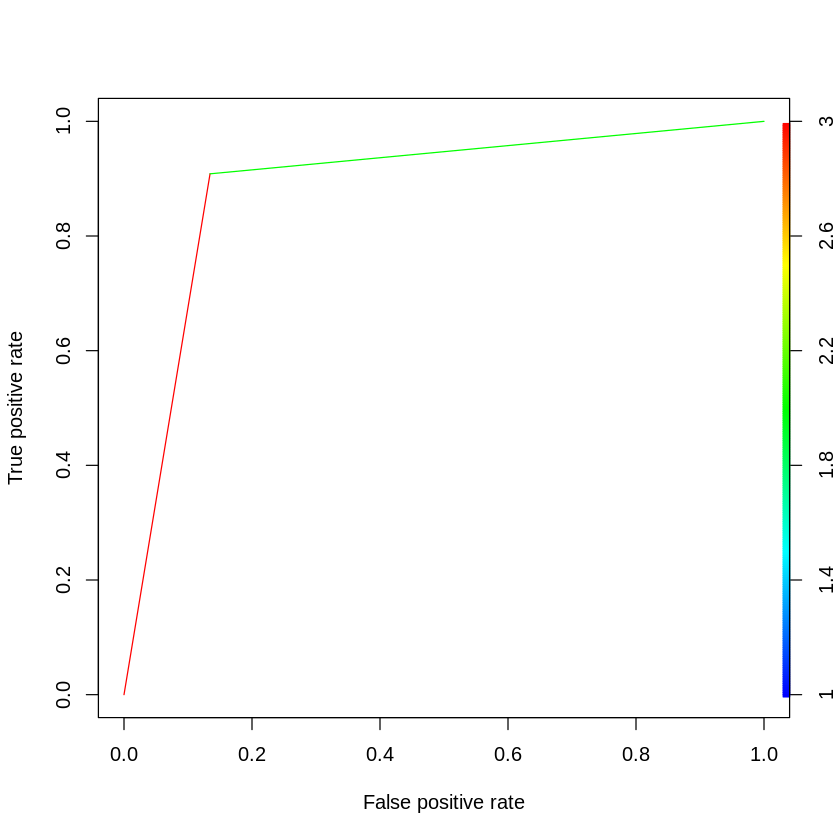

In [ ]:
# Plot da curva ROC
pr=prediction(as.numeric(predict_test),df$v16) 
prf=performance(pr, measure="tpr", x.measure="fpr")
plot(prf,colorize=TRUE)

In [ ]:
# Area under ROC curve 
auc=performance(pr, measure="auc")
auc=auc@y.values[[1]]
auc

[1] 0.8870104

A curva ROC é uma forma gráfica de visualizar a proporção de falsos e verdadeiros positivos, e a acurácia do modelo.